# Djikstra's algorithm

In [ ]:
class Graph:
    def __init__(self, nodes, connections, weights):
        self.nodes = nodes
        self.connections = connections
        self.weights = weights

    def djikstra(self, start, end):
        distance_from_start = [float('inf')] * self.nodes
        distance_from_start[start] = 0
        previous_nodes = [None] * self.nodes
        unvisited_nodes = set(range(self.nodes))

        while unvisited_nodes:
            current_node = min(unvisited_nodes, key = lambda x: distance_from_start[x])
            unvisited_nodes.remove(current_node)

            for neighbor, weight in zip(self.connections[current_node], self.weights[current_node]):
                if neighbor in unvisited_nodes:
                    new_distance = distance_from_start[current_node] + weight
                    if new_distance < distance_from_start[neighbor]:
                        distance_from_start[neighbor] = new_distance
                        previous_nodes[neighbor] = current_node

        opt_path = []
        trace = end
        while trace is not None:
            opt_path.insert(0, trace)
            trace = previous_nodes[trace]

        return distance_from_start[end], opt_path


# Example:
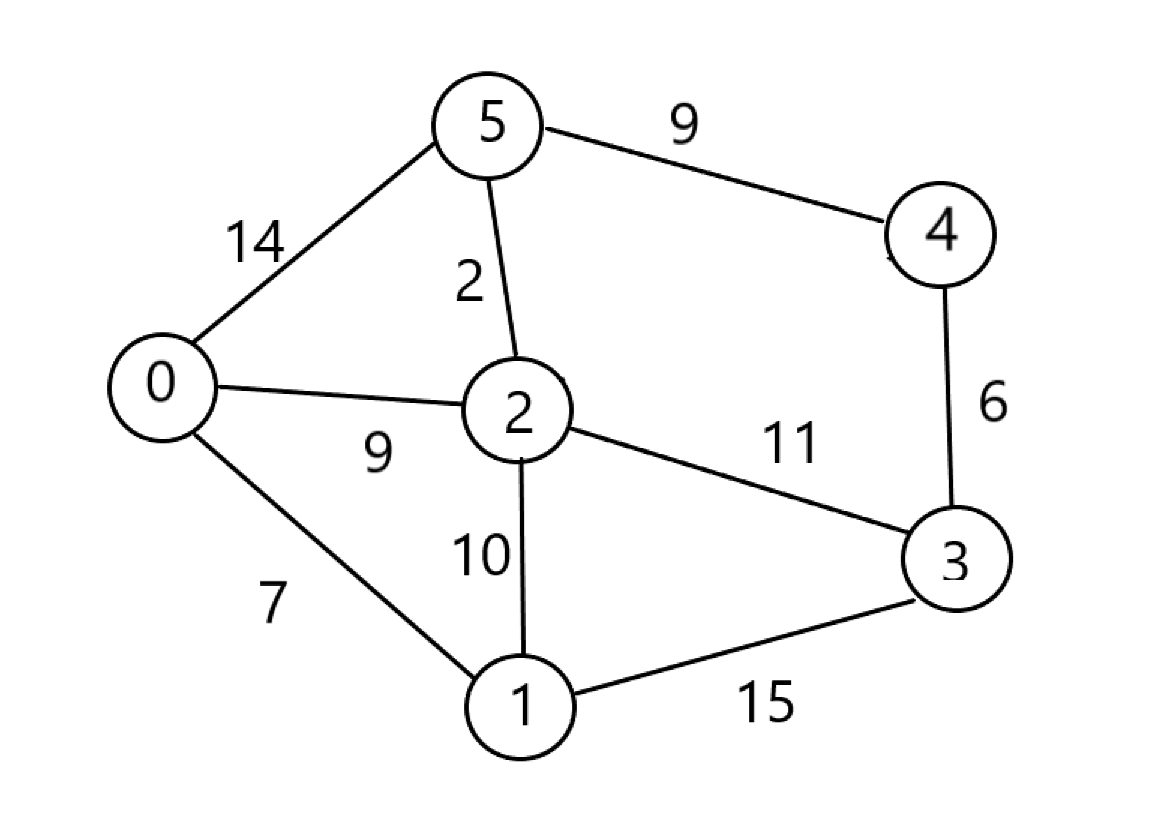

The above example has following parameters - \
`nodes = 6`

`connections = [[1,2,5], [0,2,3], [0,1,5,3], [1,2,4], [3,5], [0,2,4]] `

`weights = [[7,9,14], [7,10,15], [9,10,2,11], [15,11,6], [6,9], [14,2,9]]`

In each of the defined parameters, first element corresponds to node 0, second to node 1 and so on. 

In [ ]:
nodes = 6
connections = [[1,2,5], [0,2,3], [0,1,5,3], [1,2,4], [3,5], [0,2,4]]
weights = [[7,9,14], [7,10,15], [9,10,2,11], [15,11,6], [6,9], [14,2,9]]

graph1 = Graph(nodes, connections, weights)
distance, opt_path = graph1.djikstra(1, 4)

print('Minimum distance is', distance)
print('Optimal path is', opt_path)

Minimum distance is 21
Optimal path is [1, 2, 5, 4]
